In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

FileNotFoundError: [Errno 2] No such file or directory: '../input'

In [2]:
import keras
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers
from keras import losses
from keras.preprocessing import image
from keras.datasets import mnist

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
data = pd.read_csv("../input/the-simpsons-characters-dataset/number_pic_char.csv")

In [4]:
data.head(10)

,Unnamed: 0,name,total,train,test,bounding_box
0,0,Homer Simpson,2246,1909,337,612
1,1,Ned Flanders,1454,1236,218,595
2,2,Moe Szyslak,1452,1234,218,215
3,3,Lisa Simpson,1354,1151,203,562
4,4,Bart Simpson,1342,1141,201,554
5,5,Marge Simpson,1291,1097,194,557
6,6,Krusty The Clown,1206,1025,181,226
7,7,Principal Skinner,1194,1015,179,506
8,8,Charles Montgomery Burns,1193,1014,179,650
9,9,Milhouse Van Houten,1079,917,162,210


In [5]:
RESOLUTION = 150
BATCH_SIZE = 20

#if you need data augmentation processing
#train_datagen = ImageDataGenerator(
        #rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True,
        #validation_split=0.3)

data_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = data_datagen.flow_from_directory(
        "../input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset",
        classes=['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 
                 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 
                 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = data_datagen.flow_from_directory(
        "../input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset",
        classes=['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 
                 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 
                 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten'],
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(filters= 100, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3))) #(image_height, image_width, image_channels) (not including the batch dimension).
model.add(layers.Conv2D(filters= 100, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten()) # Output_shape=(None, 3*3*64)
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 122500)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7840064   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 8,098,414
Trainable params: 8,098,414
Non-trainable params: 0
_________________________________________________________________


## ep = 10
### lr = 0.001 

In [7]:
model1 = model
model1.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.001), metrics=['acc'])

history = model1.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=10,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

Epoch 1/10
587/587 [==============================] - 188s 320ms/step - loss: 3.0617 - acc: 0.2146 - val_loss: 2.1607 - val_acc: 0.1850
Epoch 2/10
587/587 [==============================] - 184s 313ms/step - loss: 2.0724 - acc: 0.3017 - val_loss: 2.0653 - val_acc: 0.3118
Epoch 3/10
587/587 [==============================] - 183s 311ms/step - loss: 2.0324 - acc: 0.3248 - val_loss: 2.2455 - val_acc: 0.0894
Epoch 4/10
587/587 [==============================] - 183s 311ms/step - loss: 2.1028 - acc: 0.1319 - val_loss: 2.1206 - val_acc: 0.1632
Epoch 5/10
587/587 [==============================] - 183s 312ms/step - loss: 2.0341 - acc: 0.2598 - val_loss: 2.0683 - val_acc: 0.2708
Epoch 6/10
587/587 [==============================] - 183s 312ms/step - loss: 1.9358 - acc: 0.3858 - val_loss: 2.1019 - val_acc: 0.3353
Epoch 7/10
587/587 [==============================] - 183s 311ms/step - loss: 1.8860 - acc: 0.3572 - val_loss: 2.0752 - val_acc: 0.3289
Epoch 8/10
587/587 [============================

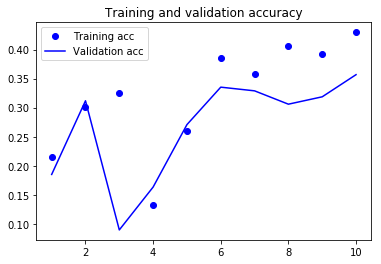

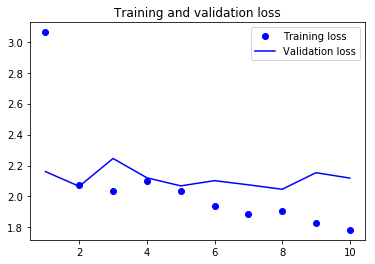

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep = 10
### lr = 0.01 

In [9]:
model2 = model
model2.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.01), metrics=['acc'])

history2 = model2.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=10,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

Epoch 1/10
587/587 [==============================] - 178s 303ms/step - loss: 8.7619 - acc: 0.1544 - val_loss: 8.6429 - val_acc: 0.1626
Epoch 2/10
587/587 [==============================] - 178s 302ms/step - loss: 5.0131 - acc: 0.1601 - val_loss: 3.4078 - val_acc: 0.2121
Epoch 3/10
587/587 [==============================] - 178s 303ms/step - loss: 3.3676 - acc: 0.2063 - val_loss: 3.4681 - val_acc: 0.2053
Epoch 4/10
587/587 [==============================] - 178s 304ms/step - loss: 3.3013 - acc: 0.2207 - val_loss: 3.3514 - val_acc: 0.2234
Epoch 5/10
587/587 [==============================] - 178s 304ms/step - loss: 3.3544 - acc: 0.2132 - val_loss: 3.4622 - val_acc: 0.1720
Epoch 6/10
587/587 [==============================] - 179s 304ms/step - loss: 3.3221 - acc: 0.2343 - val_loss: 3.3677 - val_acc: 0.2317
Epoch 7/10
587/587 [==============================] - 179s 304ms/step - loss: 3.2318 - acc: 0.2996 - val_loss: 3.4151 - val_acc: 0.1984
Epoch 8/10
587/587 [============================

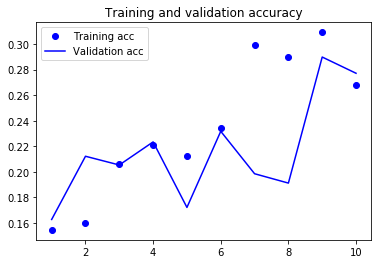

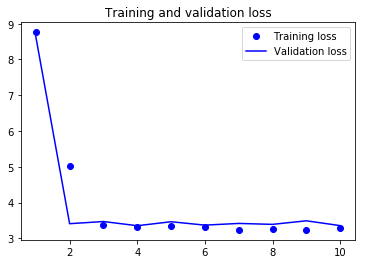

In [10]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep = 10
### lr = 0.1 

In [11]:
model3 = model
model3.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.1), metrics=['acc'])

history3 = model3.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=10,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

Epoch 1/10
587/587 [==============================] - 178s 303ms/step - loss: 14.6913 - acc: 0.0879 - val_loss: 14.7175 - val_acc: 0.0869
Epoch 2/10
587/587 [==============================] - 176s 300ms/step - loss: 14.7095 - acc: 0.0874 - val_loss: 14.7001 - val_acc: 0.0880
Epoch 3/10
587/587 [==============================] - 176s 300ms/step - loss: 14.7136 - acc: 0.0871 - val_loss: 14.7158 - val_acc: 0.0870
Epoch 4/10
587/587 [==============================] - 176s 300ms/step - loss: 14.7095 - acc: 0.0874 - val_loss: 14.7080 - val_acc: 0.0875
Epoch 5/10
587/587 [==============================] - 176s 300ms/step - loss: 14.6999 - acc: 0.0880 - val_loss: 14.7158 - val_acc: 0.0870
Epoch 6/10
587/587 [==============================] - 176s 300ms/step - loss: 14.7177 - acc: 0.0869 - val_loss: 14.7158 - val_acc: 0.0870
Epoch 7/10
587/587 [==============================] - 176s 300ms/step - loss: 14.7136 - acc: 0.0871 - val_loss: 14.7237 - val_acc: 0.0865
Epoch 8/10
587/587 [==============

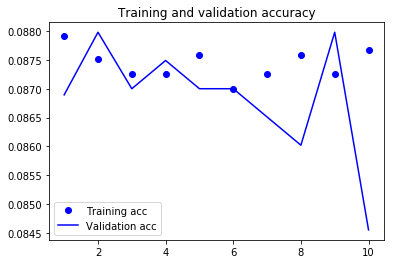

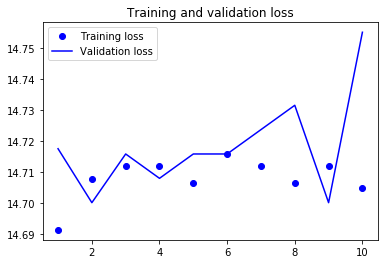

In [12]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep=50
### lr = 0.001

In [ ]:
model4 = model
model4.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.001), metrics=['acc'])

history4 = model4.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=50,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

Epoch 1/50


In [ ]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep=50
### lr = 0.01

In [ ]:
model5 = model
model5.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.01), metrics=['acc'])

history5 = model5.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=50,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

In [ ]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep=50
### lr = 0.1

In [ ]:
model6 = model
model6.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.1), metrics=['acc'])

history6 = model6.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=50,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

In [ ]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep = 100
### lr = 0.001

In [ ]:
model7 = model
model7.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.001), metrics=['acc'])

history7 = model7.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=100,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

In [ ]:
acc = history7.history['acc']
val_acc = history7.history['val_acc']
loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep = 100
### lr = 0.01

In [ ]:
model8 = model
model8.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.01), metrics=['acc'])

history8 = model8.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=10,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

In [ ]:
acc = history8.history['acc']
val_acc = history8.history['val_acc']
loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## ep = 100
### lr = 0.1

In [ ]:
model9 = model
model9.compile(loss='categorical_crossentropy', optimizer=optimizers.adagrad(lr=0.1), metrics=['acc'])

history9 = model9.fit_generator(
        train_generator,
        steps_per_epoch=(11745 // BATCH_SIZE),
        epochs=100,
        validation_data=val_generator,
        validation_steps=(2066 // BATCH_SIZE) 
    )

In [ ]:
acc = history9.history['acc']
val_acc = history9.history['val_acc']
loss = history9.history['loss']
val_loss = history9.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()